<a href="https://colab.research.google.com/github/GitMarco27/TMML/blob/main/Notebooks/011_Dtw_Loss_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Minutes Machine Learning
## Episode 11: Dtw Loss Function

#### Marco Sanguineti, 2021
---
Welcome to 3 minutes Machine Learning!

Tested on PC win1064-1036593 tf262 (note this is the lower case version!!)
18th August 2023

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

C:\Users\rbj\AppData\Local\Temp\ipykernel_1192\1158607906.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [2]:
print(tf.__version__)

2.6.0


In [3]:
import os
def loadThumb(path):
  # Let's import this video thumbnail!
  if os.path.exists(path):
    myThumb = plt.imread(path)
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.axis('off')
    ax.imshow(myThumb)
    plt.show()

loadThumb('yt_thumb_011.png')
#It didn't exist... not needed!!


## Creating DTW Loss Function


---
This works nicely


In [4]:
class DtwLoss(tf.keras.losses.Loss):
    def __init__(self, batch_size: int = 32):
        super(DtwLoss, self).__init__()
        self.batch_size = batch_size

    def call(self, y_true, y_pred):
        tmp = []
        for item in range(self.batch_size):
            tf.print(f'Working on batch: {item}\n')
            s = y_true[item, :]
            t = y_pred[item, :]
            n, m = len(s), len(t)
            dtw_matrix = []
            for i in range(n + 1):
                line = []
                for j in range(m + 1):
                    if i == 0 and j == 0:
                        line.append(0)
                    else:
                        line.append(np.inf)
                dtw_matrix.append(line)

            for i in range(1, n + 1):
                for j in range(1, m + 1):
                    cost = tf.abs(s[i - 1] - t[j - 1])
                    last_min = tf.reduce_min([dtw_matrix[i - 1][j], dtw_matrix[i][j - 1], dtw_matrix[i - 1][j - 1]])
                    dtw_matrix[i][j] = tf.cast(cost, dtype=tf.float32) + tf.cast(last_min, dtype=tf.float32)

            temp = []
            for i in range(len(dtw_matrix)):
                temp.append(tf.stack(dtw_matrix[i]))

            tmp.append(tf.stack(temp)[n, m])
        return tf.reduce_mean(tmp)

In [ ]:

noise_amplitude = 0.1  # Adjust the amplitude of the noise
random_noise = np.random.normal(0, noise_amplitude, num_samples)

# Add noise to the sine wave
noisy_sine_wave = clean_sine_wave + random_noise

for i in range(100):
    temp=np.cos(np.linspace(0, 360)*3.14/180
    
    

Create a couple of curves as actual tensors

In [5]:
x = tf.Variable(np.cos(np.linspace(0, 360)*3.14/180).reshape(1, -1))
y = tf.Variable(np.sin(np.linspace(0, 360)*3.14/180).reshape(1, -1))

For a look-see, convery back to numpy and plot'em

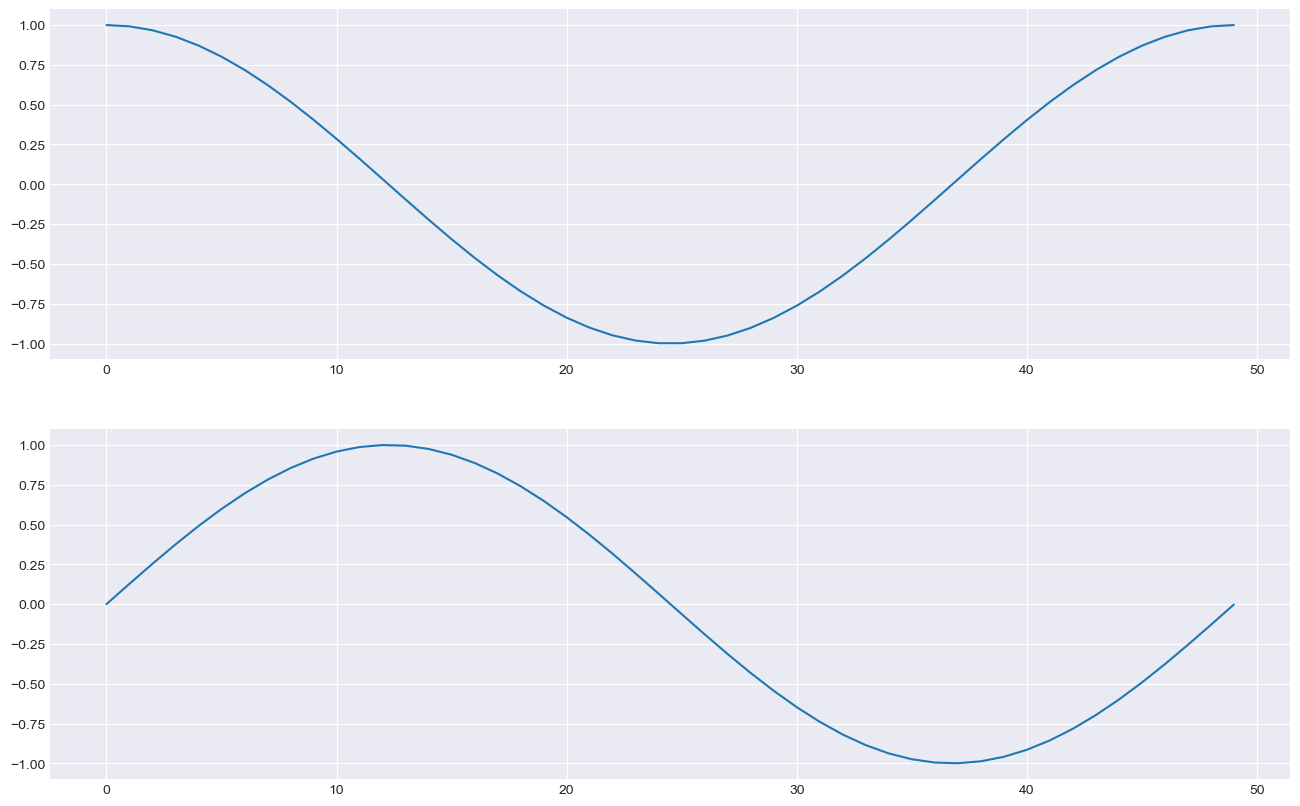

In [6]:
fig, axs = plt.subplots(nrows=2, figsize=(16, 10))
axs[0].plot(x.numpy().reshape(-1))
axs[1].plot(y.numpy().reshape(-1))
plt.show()

Create the loss class
and just see if it works by calling with x as the data and y as the prediction

In [7]:
loss = DtwLoss(batch_size=1)
print(f'Loss value: {loss(x, y).numpy()}')

Working on batch: 0

Loss value: 13.70205307006836


So it works and returns a suitable value; of course converted to a regular variable to print.

## Basic Stacked Autoencoder Implementation


---
A simple (encoder) NN model with just one layer and 10 fully connected neurones

In [8]:
# Encoder
input = tf.keras.layers.Input(shape=(x.shape[1]))
dense_1 = tf.keras.layers.Dense(10, activation='relu')(input)
encoder = tf.keras.models.Model(inputs=input, outputs=dense_1)
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                510       
Total params: 510
Trainable params: 510
Non-trainable params: 0
_________________________________________________________________


...and a matching decoder....

In [9]:
# Decoder
input = tf.keras.layers.Input(shape=(10))
dense_1 = tf.keras.layers.Dense(x.shape[1], activation='linear')(input)
decoder = tf.keras.models.Model(inputs=input, outputs=dense_1)
decoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                550       
Total params: 550
Trainable params: 550
Non-trainable params: 0
_________________________________________________________________


In [10]:
# AE
model = tf.keras.models.Sequential([
                                    encoder,
                                    decoder
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 10)                510       
_________________________________________________________________
model_1 (Functional)         (None, 50)                550       
Total params: 1,060
Trainable params: 1,060
Non-trainable params: 0
_________________________________________________________________


In [11]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
    layer_range=None,
)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=DtwLoss(batch_size=1))

In [13]:
model.fit(x.numpy(), x.numpy(), epochs=10)

Epoch 1/10
Working on batch: 0

1/1 [==============================] - 160s 160s/step - loss: 25.5491
Epoch 2/10
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 25.0164
Epoch 3/10
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 24.4533
Epoch 4/10
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 23.9241
Epoch 5/10
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 23.3771
Epoch 6/10
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 22.7438
Epoch 7/10
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 22.1308
Epoch 8/10
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 21.5718
Epoch 9/10
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 21.0577
Epoch 10/10
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 20.6264


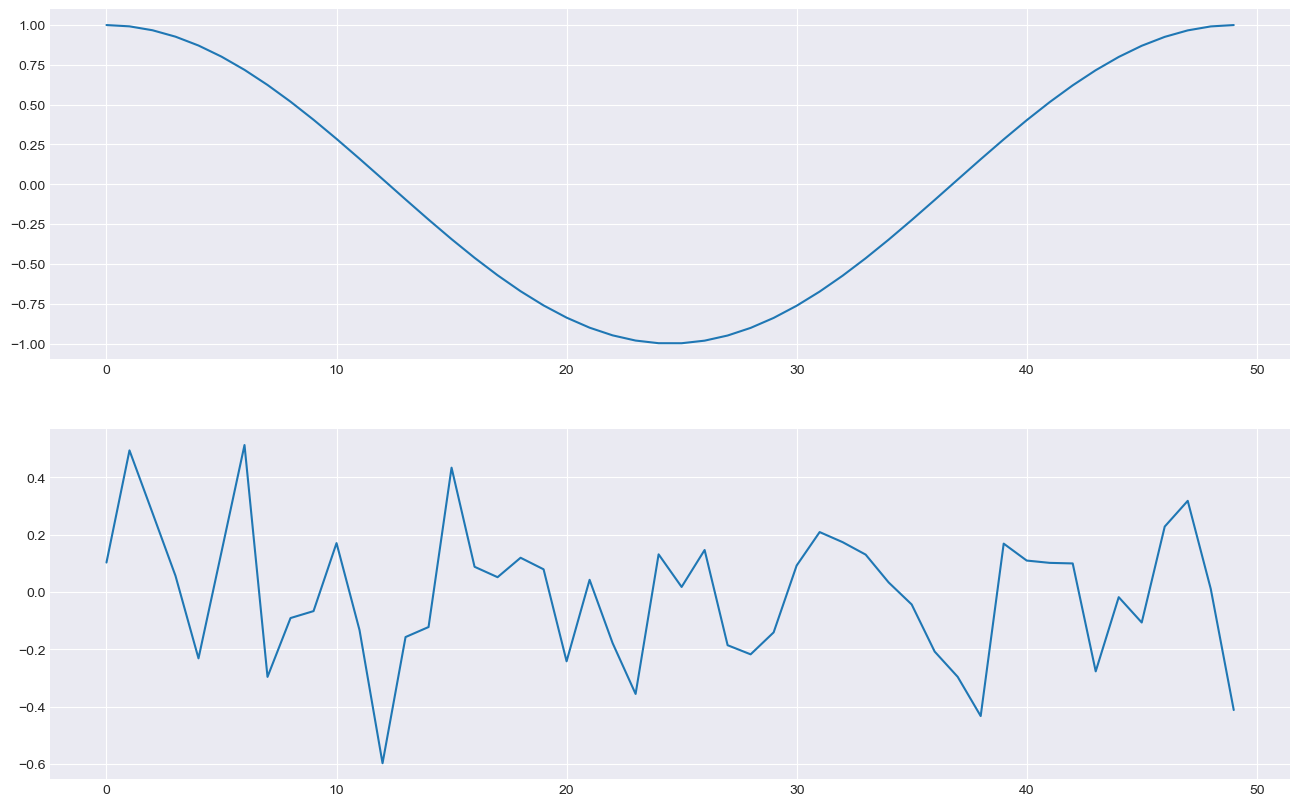

In [14]:
fig, axs = plt.subplots(nrows=2, figsize=(16, 10))
axs[0].plot(x.numpy().reshape(-1))
axs[1].plot(model(x.numpy()).numpy().reshape(-1))
plt.show()

OK doesn't work at all, I presume because we have only one file. I thought it would just overfit it? Given enough itterations.  Try again with 1000x the itterations...

## Greetings


---



In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=DtwLoss(batch_size=1))
history=model.fit(x.numpy(), x.numpy(), epochs=2000)

Epoch 1/2000
Working on batch: 0

1/1 [==============================] - 161s 161s/step - loss: 20.2422
Epoch 2/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 17.0971
Epoch 3/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 16.4405
Epoch 4/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 14.2246
Epoch 5/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 12.7586
Epoch 6/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 12.0406
Epoch 7/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 11.1981
Epoch 8/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 10.2862
Epoch 9/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 9.1445
Epoch 10/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 8.35

1/1 [==============================] - 2s 2s/step - loss: 1.7796
Epoch 83/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.9049
Epoch 84/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.8176
Epoch 85/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.7749
Epoch 86/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.8452
Epoch 87/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.8765
Epoch 88/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.8655
Epoch 89/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.9634
Epoch 90/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.8927
Epoch 91/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.8290
Epoch 92/2000
Working on batch: 0



1/1 [==============================] - 2s 2s/step - loss: 1.8058
Epoch 164/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.7801
Epoch 165/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.8025
Epoch 166/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.8803
Epoch 167/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.8194
Epoch 168/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.8747
Epoch 169/2000
Working on batch: 0

1/1 [==============================] - 1s 978ms/step - loss: 1.7896
Epoch 170/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.7997
Epoch 171/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.8639
Epoch 172/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.8542
Epoch 173/2000
Working 

1/1 [==============================] - 2s 2s/step - loss: 1.8164
Epoch 245/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.8391
Epoch 246/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.8516
Epoch 247/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.8092
Epoch 248/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.7718
Epoch 249/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.7761
Epoch 250/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.8383
Epoch 251/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.8009
Epoch 252/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.8518
Epoch 253/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.8127
Epoch 254/2000
Working on 

1/1 [==============================] - 1s 1s/step - loss: 1.9094
Epoch 326/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.9091
Epoch 327/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.8453
Epoch 328/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.7996
Epoch 329/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.9940
Epoch 330/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.9387
Epoch 331/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.9144
Epoch 332/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.9777
Epoch 333/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.8411
Epoch 334/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 2.0715
Epoch 335/2000
Working on 

1/1 [==============================] - 1s 1s/step - loss: 1.7901
Epoch 407/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.8051
Epoch 408/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.7713
Epoch 409/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.8602
Epoch 410/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.8745
Epoch 411/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.8171
Epoch 412/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.8717
Epoch 413/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.7828
Epoch 414/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.8493
Epoch 415/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.7696
Epoch 416/2000
Working on 

1/1 [==============================] - 2s 2s/step - loss: 1.7267
Epoch 488/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.7124
Epoch 489/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.7409
Epoch 490/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.8119
Epoch 491/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.7458
Epoch 492/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.7916
Epoch 493/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.6909
Epoch 494/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.6907
Epoch 495/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.8675
Epoch 496/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.7846
Epoch 497/2000
Working on 

1/1 [==============================] - 1s 1s/step - loss: 2.0350
Epoch 569/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.7998
Epoch 570/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 2.0182
Epoch 571/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 2.0125
Epoch 572/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.7514
Epoch 573/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.8684
Epoch 574/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.8015
Epoch 575/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.7093
Epoch 576/2000
Working on batch: 0

1/1 [==============================] - 1s 1s/step - loss: 1.8782
Epoch 577/2000
Working on batch: 0

1/1 [==============================] - 2s 2s/step - loss: 1.8133
Epoch 578/2000
Working on 

KeyboardInterrupt: 

TypeError: 'History' object is not subscriptable

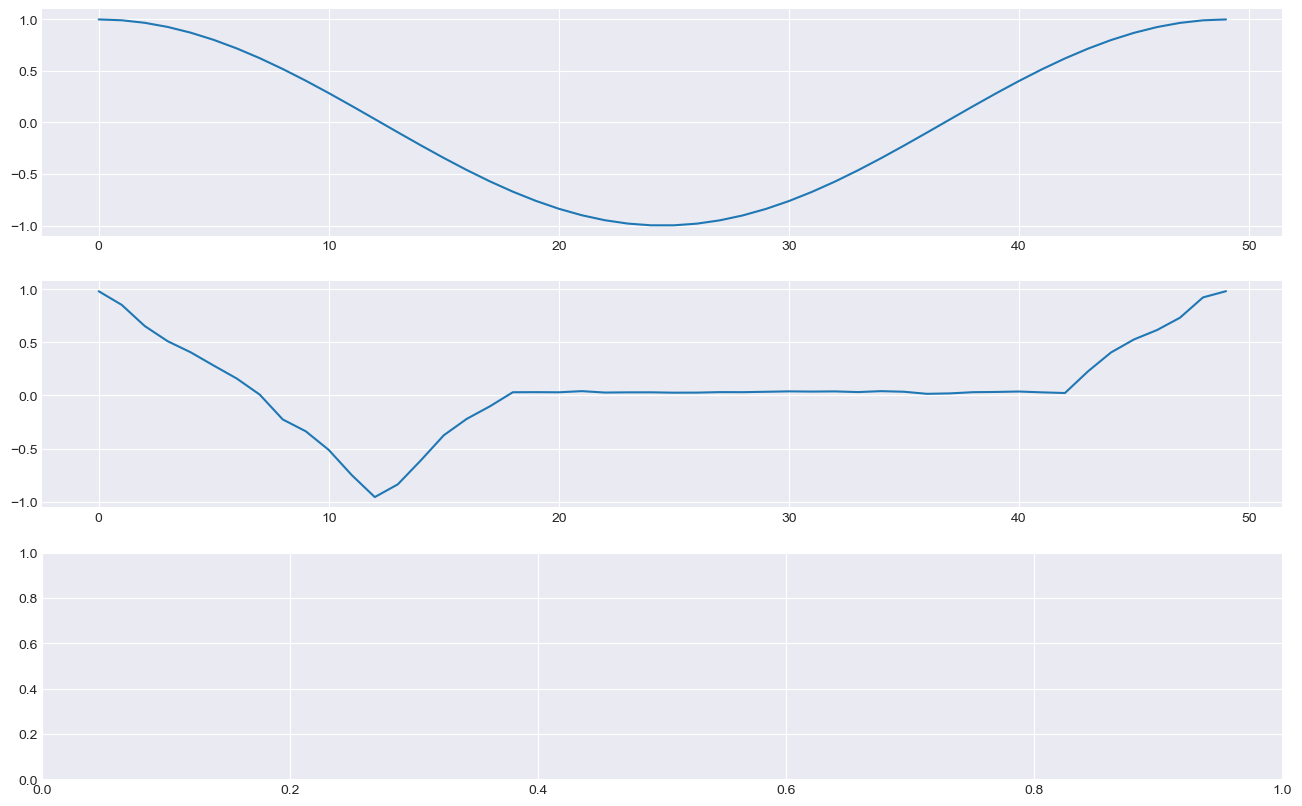

In [19]:
fig, axs = plt.subplots(nrows=3, figsize=(16, 10))
axs[0].plot(x.numpy().reshape(-1))
axs[1].plot(model(x.numpy()).numpy().reshape(-1))
axs[2].plot(model.history['loss'])
plt.show()

In [27]:
hi=model.history.history.values
print(hi)

TypeError: 'builtin_function_or_method' object is not subscriptable

In [ ]:
!pip install art
from art import tprint, aprint
tprint('See you on next videos!')
def subscribe():
  """
  Attractive subscription form
  """
  aprint("giveme", number=5)
  print(f'\n\tLike and subscribe to support this work!\n')
  aprint("giveme", number=5)
subscribe()